<a href="https://colab.research.google.com/github/abhijeet-dhumal/MyGames/blob/main/DS%26ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description : 
#   we need to predict whether a give employee will leave the organization or not. 
#   Your target column is Attrition We will create a model with the following steps:
# Algorithm used : Random forest


In [11]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
from google.colab import files 
upload = files.upload()

Saving HR_Employee_Attrition-1.csv to HR_Employee_Attrition-1.csv


In [14]:
# store the data to the dataframe
data=pd.read_csv('HR_Employee_Attrition-1.csv')
#print first 10 rows 
data.head(10)

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
5,6,No,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,...,3,80,0,8,2,2,7,7,3,6
6,7,No,59,Travel_Rarely,1324,Research & Development,3,3,Medical,1,...,1,80,3,12,3,2,1,0,0,0
7,8,No,30,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,...,2,80,1,1,2,3,1,0,0,0
8,9,No,38,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,...,2,80,0,10,2,3,9,7,1,8
9,10,No,36,Travel_Rarely,1299,Research & Development,27,3,Medical,1,...,2,80,2,17,3,2,7,7,7,7


In [15]:
data.shape

(2940, 35)

In [16]:
data.dtypes

EmployeeNumber               int64
Attrition                   object
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [17]:
data.isna()


,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2936,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2937,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2938,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
data.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,1470.500000,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,848.849221,9.133819,403.440447,8.105485,1.023991,0.0,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,735.750000,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1470.500000,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2205.250000,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2940.000000,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [19]:
# no.of employees in company and who have left 
data['Attrition']

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
2935     No
2936     No
2937     No
2938     No
2939     No
Name: Attrition, Length: 2940, dtype: object

In [20]:
data['Attrition'].value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


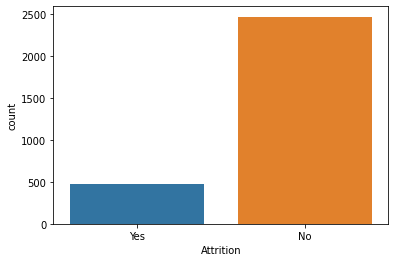

In [21]:
sns.countplot(data['Attrition'])

In [22]:
# accuracy when it always predicts no
(2466-474)/2466

0.8077858880778589

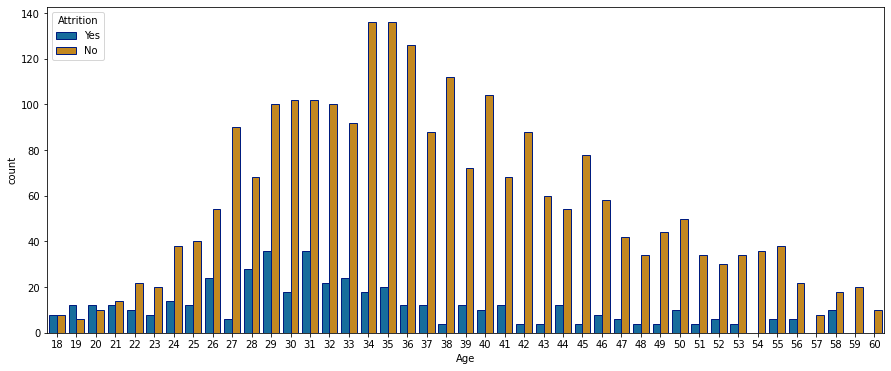

In [24]:
fig_dims=(15,6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x='Age',hue='Attrition',data=data,palette='colorblind',ax=ax,edgecolor=sns.color_palette('dark',n_colors=1));

In [25]:
for column in data.columns:
  if data[column].dtype==object:
    print(f"Column : {str(data[column].unique())}")
    print(data[column].value_counts())
    print('----------------------------------------------')

Column : ['Yes' 'No']
No     2466
Yes     474
Name: Attrition, dtype: int64
----------------------------------------------
Column : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64
----------------------------------------------
Column : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64
----------------------------------------------
Column : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64
----------------------------------------------
Column : ['Female' 'Male']
Male      1764
Female    1176
Name: Gender, dtype: int64
-------------

Text(0.5, 1.0, 'Attrition Probability')

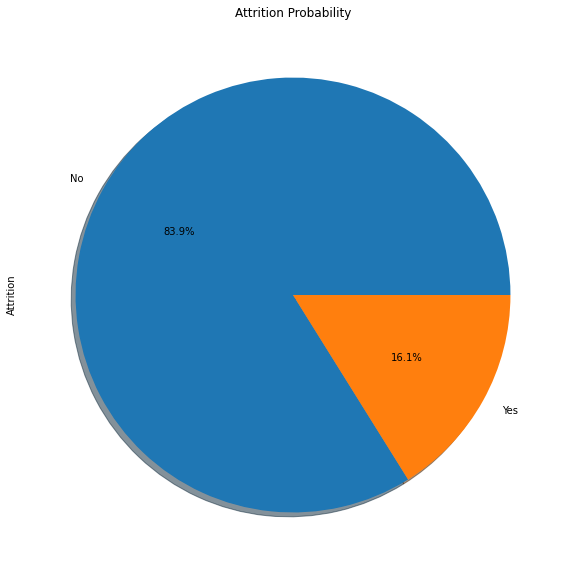

In [26]:
f, ax = plt.subplots(figsize=(10,10))
ax = data['Attrition'].value_counts(). plot.pie(explode=[0,0], autopct = '%1.1f%%', shadow=True)
ax.set_title('Attrition Probability')

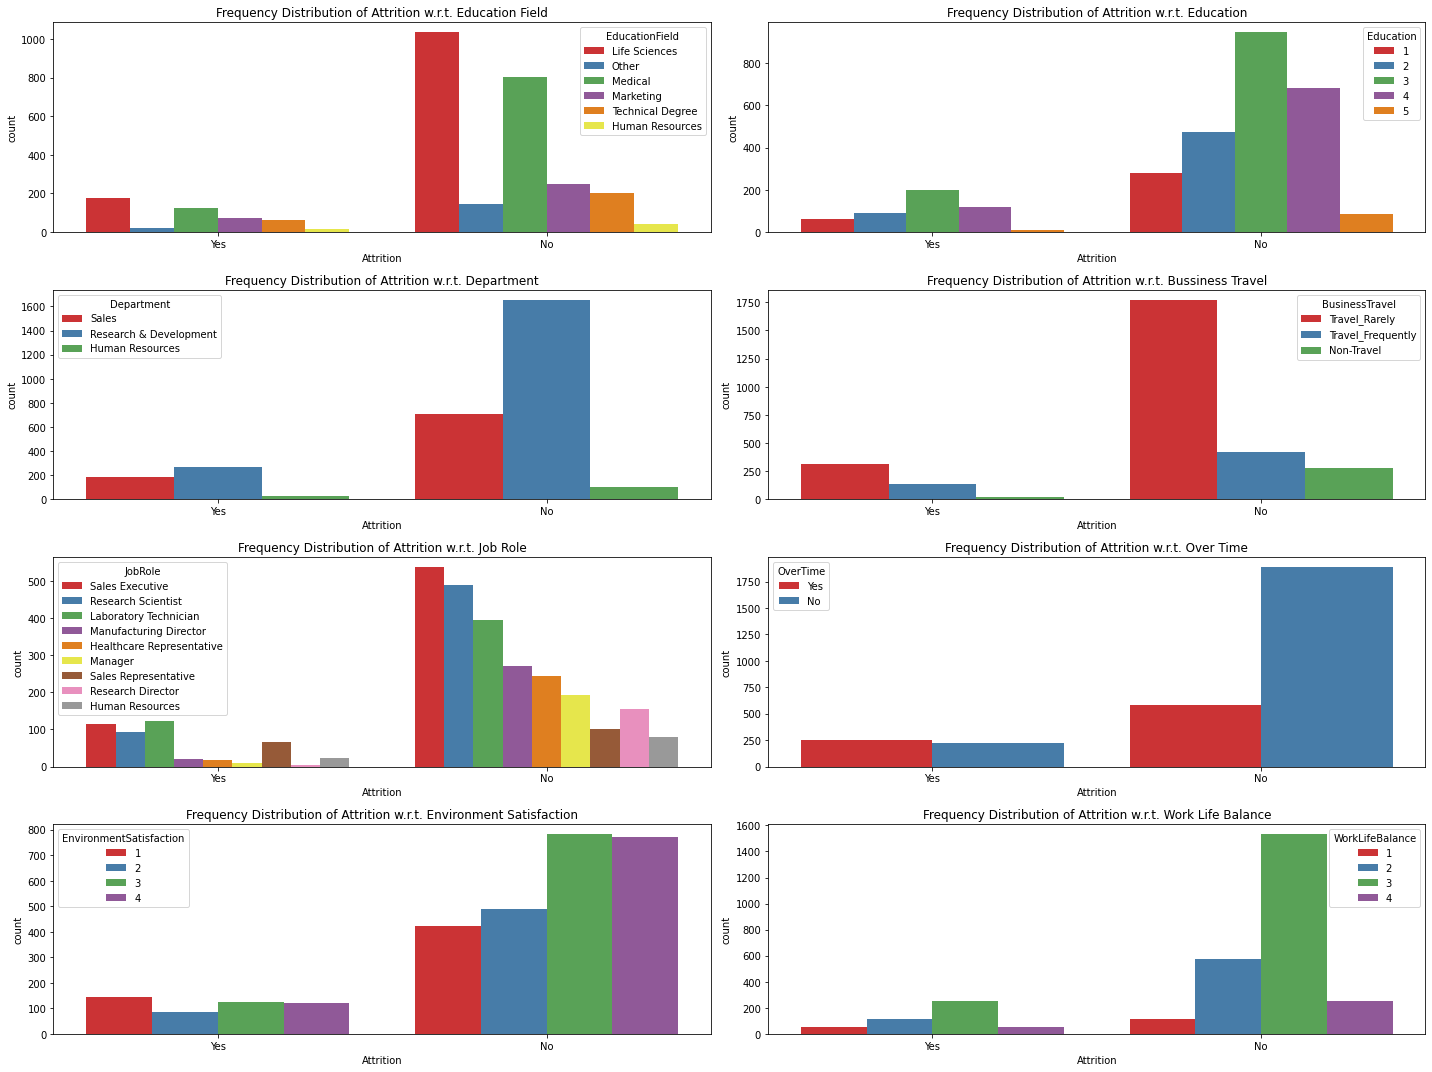

In [27]:
f, ax = plt.subplots(4,2, figsize=(20,15))

ax[0,0] = sns.countplot(x='Attrition', hue= 'EducationField', data=data, ax = ax[0,0], palette='Set1' )
ax[0,0].set_title("Frequency Distribution of Attrition w.r.t. Education Field")

ax[1,0] = sns.countplot(x='Attrition', hue= 'Department', data=data,  ax = ax[1,0], palette='Set1' )
ax[1,0].set_title("Frequency Distribution of Attrition w.r.t. Department")

ax[0,1] = sns.countplot(x='Attrition', hue= 'Education', data=data,  ax = ax[0,1], palette='Set1' )
ax[0,1].set_title("Frequency Distribution of Attrition w.r.t. Education")

ax[1,1] = sns.countplot(x='Attrition', hue= 'BusinessTravel', data=data,  ax = ax[1,1], palette='Set1' )
ax[1,1].set_title("Frequency Distribution of Attrition w.r.t. Bussiness Travel")

ax[2,0] = sns.countplot(x='Attrition', hue= 'JobRole', data=data, ax = ax[2,0], palette='Set1' )
ax[2,0].set_title("Frequency Distribution of Attrition w.r.t. Job Role")

ax[2,1] = sns.countplot(x='Attrition', hue= 'OverTime', data=data,  ax = ax[2,1],palette='Set1' )
ax[2,1].set_title("Frequency Distribution of Attrition w.r.t. Over Time")

ax[3,0] = sns.countplot(x='Attrition', hue= 'EnvironmentSatisfaction', data=data,  ax = ax[3,0],palette='Set1' )
ax[3,0].set_title("Frequency Distribution of Attrition w.r.t. Environment Satisfaction")

ax[3,1] = sns.countplot(x='Attrition', hue='WorkLifeBalance', data=data, ax = ax[3,1], palette='Set1')
ax[3,1].set_title("Frequency Distribution of Attrition w.r.t. Work Life Balance")

f.tight_layout()

In [28]:
column_list = ['EmployeeNumber','Attrition','EmployeeCount','Over18','StandardHours']
x = data.drop(column_list, axis = 1)
y = data['Attrition']

In [29]:
print(x.columns)

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [30]:
print(y)


0       Yes
1        No
2       Yes
3        No
4        No
       ... 
2935     No
2936     No
2937     No
2938     No
2939     No
Name: Attrition, Length: 2940, dtype: object


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2,random_state=42 )


In [32]:
print(X_train.shape, X_test.shape)

(2352, 30) (588, 30)


In [33]:
encoder = ce.OrdinalEncoder(cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [34]:
cols = X_train.columns

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train, columns= [cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [35]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [36]:
y_pred

array(['No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'No',

In [37]:
print(len(y_pred))

588


In [38]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{'No': 513, 'Yes': 75}

In [42]:
score = accuracy_score(Y_test, y_pred)
 
k=np.abs(score)*100
d = {'Algorithm used': ['Random Forest'],
     'Randomforest classifier score': [k]} 
new = pd.DataFrame.from_dict(d)
  
new

,Algorithm used,Randomforest classifier score
0,Random Forest,95.238095
